<a href="https://colab.research.google.com/github/MALTOisHERE/Fingerprint_Recognition_System/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 <h1>1. Importing Libraries</h1>

*   **cv2:** Used for reading and processing images in grayscale.
*   **PIL (Pillow):** Used for image manipulation such as cropping, opening, and saving images.
*   **numpy:** Handles array operations.
*   **os & os.path:** Used for file path management.

*  **skimage** (filters, morphology): Provides functions for thresholding (Otsu’s method) and applying morphological operations.


In [2]:
import cv2
from PIL import Image, ImageOps, ImageEnhance
import numpy as np
import os
from os.path import basename, join
from skimage import util, filters, morphology


<h1> 2. Variables Definition</h1>

In [3]:
# global variables
EXPAND_WIDTH = 250
EXPAND_HEIGHT = 250

CropWidth = 220
CropHeight = 220
ExpWidth = 250
ExpHeight = 250

<h1> 3. Extracting the Fingerprint Region</h1>

In [4]:
# This function calculates the region of interest (ROI) in a fingerprint image
def get_fp_region(img_path, crop_width=250, crop_height=250):
    CropWidth = crop_width
    CropHeight = crop_height
    ExpWidth = EXPAND_WIDTH
    ExpHeight = EXPAND_HEIGHT

    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    thresh = filters.threshold_otsu(image)

    picBW = image > thresh
    # plot_image(picBW, "B&W")


    # Helps remove small holes and smooth the shape of the fingerprint region.
    bw = morphology.closing(image > thresh, morphology.square(3))
    # plot_image(bw, "B&W")

    cleared = bw.copy()

    img_width = image.shape[1]
    img_height = image.shape[0]
    #print(img_width, img_height)

    crop_l = img_width
    crop_r = 0
    crop_t = img_height
    crop_b = 0
    for i in range(img_height):
        for j in range(img_width):
            if cleared[i, j] == False:
                if (crop_l > j):
                    crop_l = j
                if (crop_r < j):
                    crop_r = j
                if (crop_t > i):
                    crop_t = i
                if (crop_b < i):
                    crop_b = i

    if ((crop_r - crop_l) < CropWidth):
        diff = CropWidth - (crop_r - crop_l)
        if (crop_r + crop_l > CropWidth): # right
            if (img_width - crop_r > diff / 2):
                crop_r += diff / 2
                crop_l -= diff / 2
            else:
                crop_r = img_width - 1
                crop_l = crop_r - (CropWidth + 2)
        else: # left
            if (crop_l > diff / 2):
                crop_l -= diff / 2
                crop_r += diff / 2
            else:
                crop_l = 1
                crop_r = crop_l + (CropWidth + 2)
    if ((crop_b - crop_t) < CropHeight):
        diff = CropHeight - (crop_b - crop_t)
        if (crop_b + crop_t > CropHeight): # bottom
            if (img_height - crop_b > diff / 2):
                crop_b += diff / 2
                crop_t -= diff / 2
            else:
                crop_b = img_height - 1
                crop_t = crop_b - (CropHeight + 2)
        else: # top
            if (crop_t > diff / 2):
                crop_t -= diff / 2
                crop_b += diff / 2
            else:
                crop_t = 1
                crop_b = crop_t + (CropHeight + 2)

    # expand region for rotation
    crop_l = (crop_r + crop_l - CropWidth) / 2
    crop_r = crop_l + CropWidth
    crop_t = (crop_t + crop_b - CropHeight) / 2
    crop_b = crop_t + CropHeight
    crop_l = (int)(crop_l - ((ExpWidth - CropWidth) / 2))
    crop_r = (int)(crop_r + ((ExpWidth - CropWidth) / 2))
    crop_t = (int)(crop_t - ((ExpHeight - CropHeight) / 2))
    crop_b = (int)(crop_b + ((ExpHeight - CropHeight) / 2))

    # check expanded region
    diff = 0
    if (crop_l < 0):
        diff = 0 - crop_l
        crop_l = crop_l + diff
        crop_r = crop_r + diff
    if (crop_r >= img_width):
        diff = crop_r - (img_width - 1)
        crop_l = crop_l - diff
        crop_r = crop_r - diff

    diff = 0
    if (crop_t < 0):
        diff = 0 - crop_t
        crop_t = crop_t + diff
        crop_b = crop_b + diff
    if (crop_b >= img_height):
        diff = crop_b - (img_height - 1)
        crop_t = crop_t - diff
        crop_b = crop_b - diff

    return (crop_l, crop_t, crop_r, crop_b)

<h1>4. Preprocessing Function</h1>

The function opens the input image and retrieves the ROI boundaries using get_fp_region.

In [5]:
def preprocess(input_img, out_img):
    finger_idx = 1
    # get fingerprint region
    img = Image.open(input_img)
    (crop_l, crop_t, crop_r, crop_b) = get_fp_region(input_img)
    # crop for process image
    crop_x = (ExpWidth - CropWidth) / 2
    crop_y = (ExpHeight - CropHeight) / 2
    img = img.crop([crop_l, crop_t, crop_r, crop_b])
    # single crop - save
    img_c = img.crop([crop_x, crop_y, crop_x + CropWidth, crop_y + CropHeight])
    img_c.save(out_img)

In [ ]:

preprocess(
    "/content/drive/MyDrive/biometric-data/dataset/1_1_1.jpg",
    "/content/drive/MyDrive/biometric-data/sucon.jpg"
)

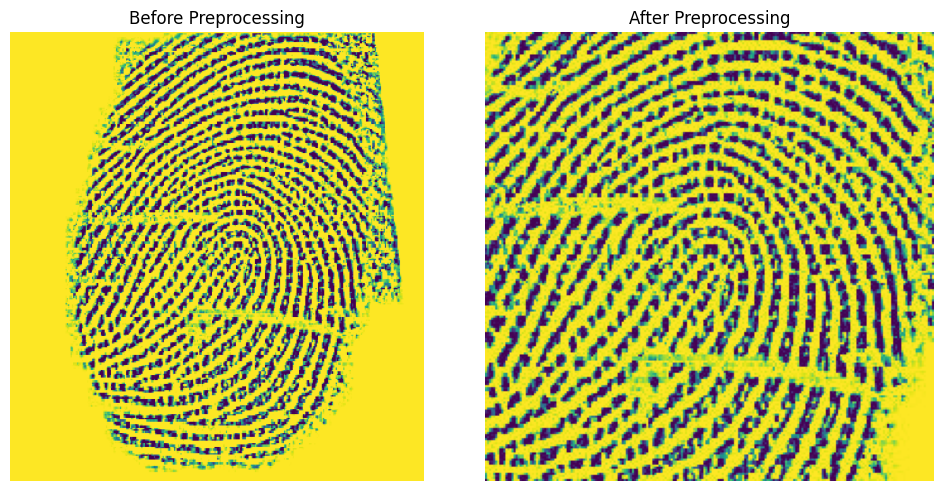

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Charger les images
img1 = mpimg.imread('/content/drive/MyDrive/biometric-data/dataset/1_1_1.jpg')
img2 = mpimg.imread('/content/drive/MyDrive/biometric-data/1_1_1.jpg')

# Créer des sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 ligne, 2 colonnes

# Afficher la première image
axes[0].imshow(img1)
axes[0].axis('off')  # Masquer les axes
axes[0].set_title('Before Preprocessing')  # Ajouter un titre

# Afficher la deuxième image
axes[1].imshow(img2)
axes[1].axis('off')
axes[1].set_title('After Preprocessing')

plt.tight_layout()
plt.show()